In [45]:
#IMPORTING LIBRARIES
import pandas as pd
import time
#FOR SPLITING DATA
from sklearn.model_selection import train_test_split
# FOR CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
#IMPORTING ALL MODELS FROM SKLEARN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import time




In [46]:
#LOADING DATASET
df = pd.read_csv("/content/titanic data.csv")

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,classification,cluster
0,1,1,female,38.0,1,0,0.139136,C,female survided,0
1,1,1,female,35.0,1,0,0.103644,S,female survided,0
2,0,1,male,54.0,0,0,0.101229,S,younger men not survival,1
3,1,3,female,4.0,1,1,0.032596,S,female survided,2
4,1,1,female,58.0,0,0,0.051822,S,female survided,1


In [48]:
df.shape

(144, 10)

In [49]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,cluster
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.645833,1.180556,36.927083,0.340278,0.368056,0.139869,0.854167
std,0.479929,0.496882,15.282877,0.569176,0.655760,0.148104,0.801823
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.750000,0.000000,0.000000,0.053536,0.000000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,0.102579,1.000000
75%,1.000000,1.000000,48.000000,1.000000,1.000000,0.162314,2.000000
max,1.000000,3.000000,80.000000,3.000000,2.000000,1.000000,2.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        144 non-null    int64  
 1   Pclass          144 non-null    int64  
 2   Sex             144 non-null    object 
 3   Age             144 non-null    float64
 4   SibSp           144 non-null    int64  
 5   Parch           144 non-null    int64  
 6   Fare            144 non-null    float64
 7   Embarked        144 non-null    object 
 8   classification  144 non-null    object 
 9   cluster         144 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 11.4+ KB


<ipython-input-51-1c73509e8015>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


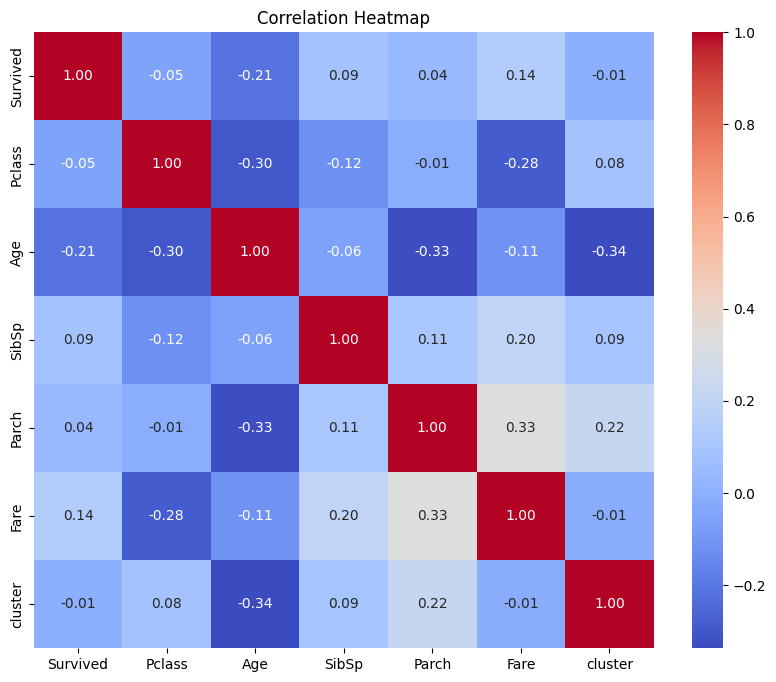

In [51]:
import matplotlib.pyplot as plt

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [52]:
#LABEL ENCODER FOR CONVERTING STRING TO FLOAT
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [53]:
# Prepare the data
x = df.drop('classification', axis=1)
y = df['classification']

In [54]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,classification,cluster
0,1,1,0,38.0,1,0,0.139136,C,female survided,0
1,1,1,0,35.0,1,0,0.103644,S,female survided,0
2,0,1,1,54.0,0,0,0.101229,S,younger men not survival,1
3,1,3,0,4.0,1,1,0.032596,S,female survided,2
4,1,1,0,58.0,0,0,0.051822,S,female survided,1


## Logistic Regression

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
 #LABEL ENCODER FOR CONVERTING STRING TO FLOAT


# SPLITING DATA INTO FEARURES AND TARGET
X = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y = df['classification']

#CREATING MODEL OF LOGISTIC REGRESSION
model = LogisticRegression()

#FITTING THE DATA IN MODEL
model.fit(X, y)

#PREDICTING THE CLASS LABEL FOR DATA
predictions = model.predict(X)

#ACCRACY OF REGRESSION
accuracy_regression = model.score(X, y)
print( model.score(X, y))



0.9791666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [15]:
def current_milli_time():
    return round(time.time() * 1000)


In [60]:
#CALCULATING INITIAL TIME FOR CONFUSION MATRIX
rf_start_time = current_milli_time()

#RANDOM FOREST CLASSIFICATION OBJECT THAT CALCULATES GINI
rfc = RandomForestClassifier(n_estimators=89, criterion='gini')


#FITTING DATA INTO MODEL
rfc.fit(x_train, y_train)
#ENDING TIME OF MODEL TRAINING
rf_end_time = current_milli_time()
#TOTAL DURATION
rf_duration = rf_end_time - rf_start_time
#PREDICTING DATA
y_pred_rfc = rfc.predict(x_test)
#CONFUSION MATRIX
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
#ACCURACY RATE
ar_rfc = calculate_AR(cm_rfc)
ar_rfc

0.9

In [61]:
#PRINTNG CONFUSION MATRIX OF RANDOM FOREST
print(cm_rfc)

[[ 9  0  0  0]
 [ 1  0  0  0]
 [ 0  0 13  0]
 [ 0  0  0  6]]


## Naive Bayes

In [64]:
#NAIVE BAYES CLASSIFIER
#CALCULATING INITIAL TIME
nbstart_time = current_milli_time()
#NAIVE BAYES CLASSIFIER
gnb = GaussianNB()
#TRAINING DATA
gnb.fit(x_train,y_train)
#CALCULATING ENDING TIME
nbend_time = current_milli_time()
#CALCULATING TOTAL DURATION
NBduration = nbend_time - nbstart_time
#PREDICTING DATA
y_pred_nb = gnb.predict(x_test)
#CONFUSION MATRIX
cm_nb = confusion_matrix(y_test,y_pred_nb)
#CALCULATING ACCURACY RATE
ar_nb = calculate_AR(cm_nb)
ar_nb

0.9

In [65]:
#CONFUSION MATRIX FOR NAIVE BAYES
print(cm_nb)

[[ 9  0  0  0]
 [ 1  0  0  0]
 [ 0  0 13  0]
 [ 0  0  0  6]]


## KNN Classifier

In [66]:
#KNN CLASSIFIER
#CALCULATING INITIAL TIME
knnstart_time = current_milli_time()
#CREATING OBJECT OF KNN CLASSIFIER
knn = KNeighborsClassifier()
#TRAINING DATA
knn.fit(x_train,y_train)
#OBTAINING ENDING TIME
knnend_time = current_milli_time()
#TOTAL DURATION
knnduration=knnend_time - knnstart_time
#PREDICTING DATA
y_pred_knn = knn.predict(x_test)
#CONFUSION MATRIX
cm_knn = confusion_matrix(y_test,y_pred_knn)
#ACCURACY RATE
ar_knn = calculate_AR(cm_knn)
ar_knn

1.0

In [67]:
#CONFUSION MATRIX OF KNN
print(cm_knn)

[[ 2  0  5  2]
 [ 0  0  1  0]
 [ 1  0 11  1]
 [ 1  1  2  2]]


## Decision Tree

In [68]:
model2 = DecisionTreeClassifier()
e = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
#df['classification'] = le.fit_transform(df['classification'])

# Split the data into features and target
X = df[['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y = df['classification']



# Fit the model to the data
model2.fit(X, y)

# Predict the class labels for the data
predictions = model2.predict(X)
prediction_DecisionTree = model2.score(X, y)
# Print the accuracy of the model
print( prediction_DecisionTree )


# Create a confusion matrix
cm = confusion_matrix(df['classification'], predictions)

# Print the confusion matrix
print(cm)

1.0
[[47  0  0  0]
 [ 0  4  0  0]
 [ 0  0 58  0]
 [ 0  0  0 35]]


## Accuracy

In [69]:
# Printing the results
print("")

print("Logistic Regression", accuracy_regression)
print("Random Forest Classifation", ar_rfc)
print("Decision Tree Classifier", prediction_DecisionTree)
print("Naive Bayes Classifier", ar_nb)
print("KNN Classifier", ar_knn )



Logistic Regression 0.9791666666666666
Random Forest Classifation 0.9
Decision Tree Classifier 1.0
Naive Bayes Classifier 0.9
KNN Classifier 1.0


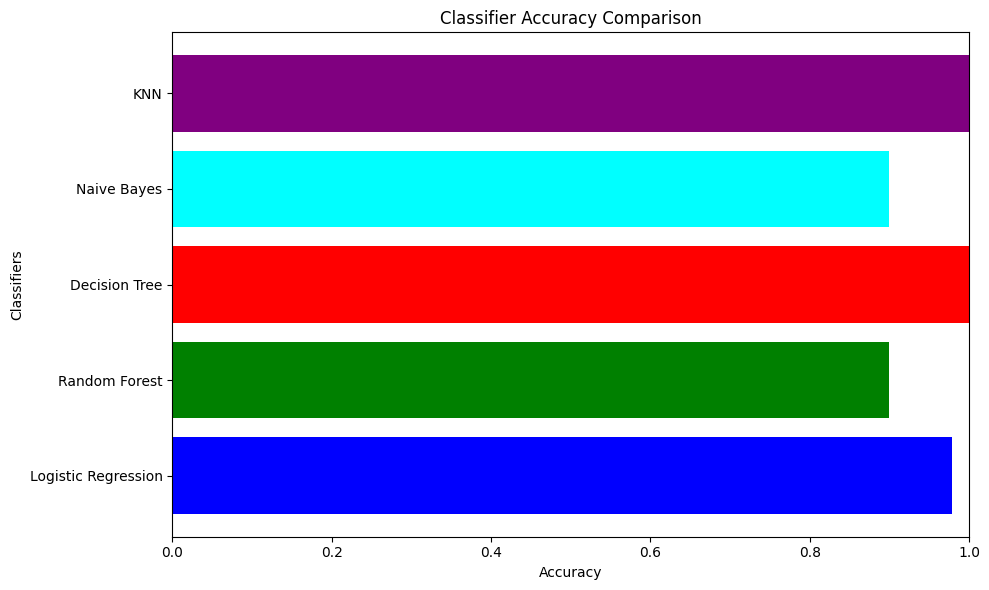

In [71]:
import matplotlib.pyplot as plt

# Accuracy values for each classifier
classifiers = ["Logistic Regression", "Random Forest", "Decision Tree", "Naive Bayes", "KNN"]
accuracy_values = [accuracy_regression, ar_rfc, prediction_DecisionTree, ar_nb, ar_knn]

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracy_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.ylabel("Classifiers")
plt.xlabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.xlim(0, 1.0)  # Set the x-axis range (0 to 1.0 for accuracy)
plt.tight_layout()

# Show the graph
plt.show()


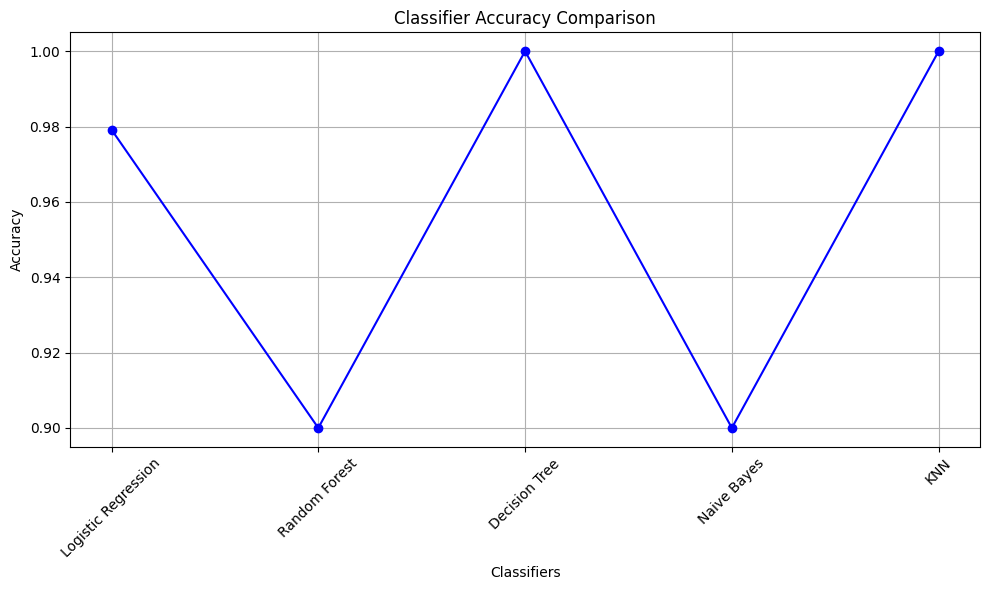

In [72]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ["Logistic Regression", "Random Forest", "Decision Tree", "Naive Bayes", "KNN"]

# Accuracy values for each classifier
accuracy_values = [accuracy_regression, ar_rfc, prediction_DecisionTree, ar_nb, ar_knn]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(classifiers, accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()


# **Confusion Matrix**

In [56]:
# This function gives us the time value in miliseconds.
def current_milli_time():
    return round(time.time() * 1000)

# This function calculates the accuracy rate of a confusion matrix.
def calculate_AR(confusion_matrix):
    return (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1])

def print_values(algorithm:str, accuracy_rate:float, training_time:int):
    print(algorithm, "Accuracy rate", accuracy_rate, "Training time:", training_time)